In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [27]:
data = pd.read_excel("New Report.xlsx")
df = pd.DataFrame(data)

In [28]:
# Data Cleaning:
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.applymap(lambda x: x.replace("Â", "") if isinstance(x, str) else x)
df_cleaned = df_cleaned.drop(columns=["Unnamed: 16", "Image URl"], errors='ignore')
df_cleaned = df_cleaned.dropna(thresh=len(df_cleaned.columns) - 3)
df_cleaned['launch_date'] = pd.to_datetime(df_cleaned['launch_date'], errors='coerce')
df_cleaned['date_and_time_utc'] = pd.to_datetime(df_cleaned['date_and_time_utc'], errors='coerce')

df_cleaned.head()

C:\Users\SUMBERA\AppData\Local\Temp\ipykernel_8188\1591501125.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: x.replace("Â", "") if isinstance(x, str) else x)


launch_date                         customer     launch_site  \
0  2012-05-22             NASA COTS (DEMO 2/3)  CAPE CANAVERAL   
1  2012-05-22             NASA COTS (DEMO 2/3)  CAPE CANAVERAL   
2  2012-10-08  NASA RESUPPLY TO ISS (FLIGHT 1)  CAPE CANAVERAL   
3  2012-10-08  NASA RESUPPLY TO ISS (FLIGHT 1)  CAPE CANAVERAL   
4  2012-10-08  NASA RESUPPLY TO ISS (FLIGHT 1)  CAPE CANAVERAL   

              vehicle   date_and_time_utc version_booster launch_site_wiki  \
0  DRAGON  & FALCON 9 2012-05-22 07:44:00         F9 v1.0      CCAFS LC-40   
1  DRAGON  & FALCON 9 2012-05-22 07:44:00         F9 v1.0      CCAFS LC-40   
2  DRAGON  & FALCON 9 2012-10-08 00:35:00         F9 v1.0      CCAFS LC-40   
3  DRAGON  & FALCON 9 2012-10-08 00:35:00         F9 v1.0      CCAFS LC-40   
4  DRAGON  & FALCON 9 2012-10-08 00:35:00         F9 v1.0      CCAFS LC-40   

                           payload orbit customer_wiki   launch_outcome  \
0           Dragon demo flight C2+   LEO   NASA (COTS)          Success   
1           Dragon demo flight C2+   LEO   NASA (COTS)          Success   
2  Orbcomm-OG2 (secondary payload)   LEO       Orbcomm  Partial failure   
3  Orbcomm-OG2 (secondary payload)   LEO       Orbcomm  Partial failure   
4                     SpaceX CRS-1   LEO    NASA (CRS)          Success   

      landing landing_detail  \
0  No attempt            NaN   
1  No attempt            NaN   
2  No attempt            NaN   
3  No attempt            NaN   
4  No attempt            NaN   

                                             comment  month_number Attribute  \
0  Launch was scrubbed on first attempt, second l...             5        KG   
1  Launch was scrubbed on first attempt, second l...             5        LB   
2                                                NaN            10        KG   
3                                                NaN            10        LB   
4  CRS-1 was successful, but the secondary payloa...            10        KG   

   Value  
0    525  
1   1157  
2    172  
3    379  
4    500

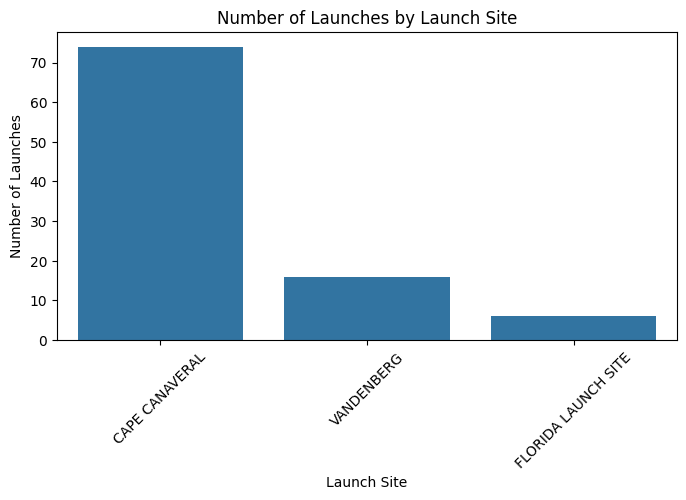

In [29]:
# Plotting
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='launch_site', order=df_cleaned['launch_site'].value_counts().index)
plt.title('Number of Launches by Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='launch_outcome', order=df_cleaned['launch_outcome'].value_counts().index)
plt.title('Launch Outcomes')
plt.xlabel('Launch Outcome')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df_cleaned, x='version_booster', order=df_cleaned['version_booster'].value_counts().index)
plt.title('Number of Launches by Booster Version')
plt.xlabel('Booster Version')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 4))
df_cleaned['year'] = df_cleaned['launch_date'].dt.year
sns.countplot(data=df_cleaned, x='year', order=df_cleaned['year'].value_counts().index)
plt.title('Number of Launches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.show()

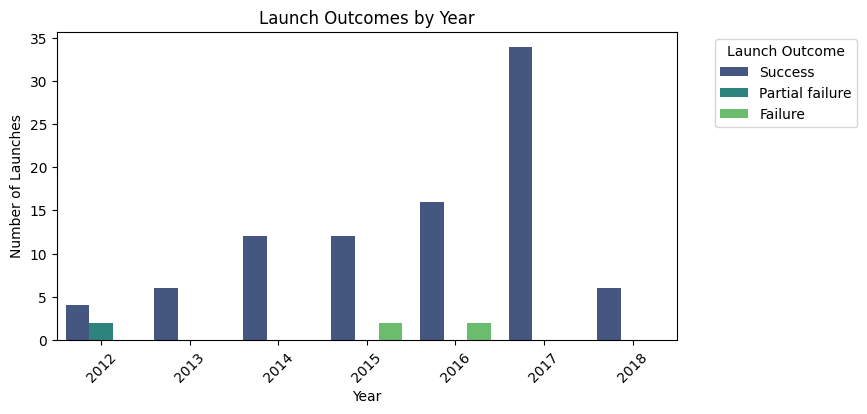

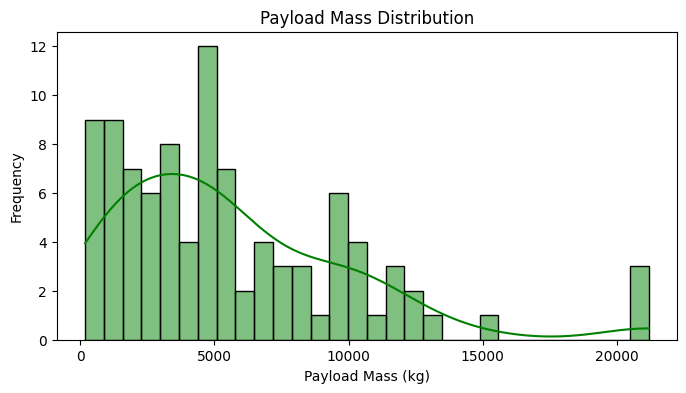

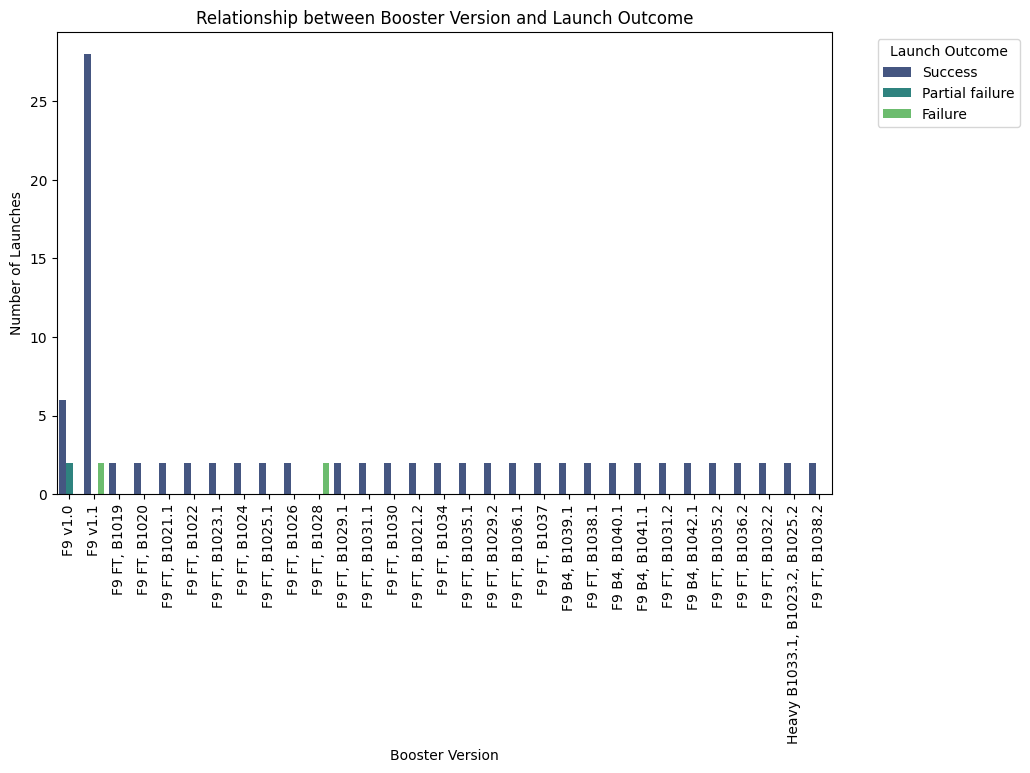

In [30]:
# 1. Launch Outcomes by Year
plt.figure(figsize=(8, 4))
df_cleaned['year'] = df_cleaned['launch_date'].dt.year
sns.countplot(data=df_cleaned, x='year', hue='launch_outcome', palette="viridis")
plt.title('Launch Outcomes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(title='Launch Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Payload Mass Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df_cleaned, x='Value', bins=30, kde=True, color="green")
plt.title('Payload Mass Distribution')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.show()

# 3. Launch Outcomes by Launch Site
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='launch_site', hue='launch_outcome', palette="viridis")
plt.title('Launch Outcomes by Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.legend(title='Launch Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Relationship between Booster Version and Launch Outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='version_booster', hue='launch_outcome', palette="viridis")
plt.title('Relationship between Booster Version and Launch Outcome')
plt.xlabel('Booster Version')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.legend(title='Launch Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

